#Importacion de librerias
Primero a la hora de empezar a trabajar con los datos debemos importar la librerias y algunas de las herramientas que vamos a utilizar de primera mano.
Comenzaremos por importar las librerias pandas y numpy esenciales para el trabajo que vamos a hacer de manipulacion de datos.

In [86]:
import pandas as pd
import numpy as np

 #Conexión con los datos
 Usaremos pandas para conectarnos a nuestros datos y poder empezar a manipularlos.

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/LautaroRodriguez16711/dataproyect/refs/heads/main/diabetes_prediction_dataset.csv')

In [88]:
df.head(8) # vemos las columnas como estan compuetas.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0


#Descripcion de los datos
La fincion describe para ver algunos detalles mas del dataset

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Aparentemente se aprecia ciertos detalles tales como

#age
Tiene un conjunto de edades muy variadas desde bebes hasta adultos mayores, muy bueno para agregar variabilidad a nuestro analisis.
#hypertension
Vemos que alrededor del 7,4 % de los pacientes tiene hipertension
#heart_disease
Tambien vemos que alrededor del 3,9 % de los pacientes sufre de una enfermedad cardiaca.
#bmi
El bmi o indice de masa corporal en promedio indica que los pacientes son diagnosticados con sobre peso ( indice de un 27.32 indica sobrepeso ), los extremos son raros (10, 95.6) que son posibles pero en el caso de un indice de 10 indica que es un peso muy bajo ya que los parametros de normalidad/saludable son entre 18.5 y 24.9 y en caso del indice de 95.6 indica que el paciente sufre de un extremo caso de sobrepeso, que es posible que muy poco comun.
#HbA1c_level
En este caso nos indica que el nivel de hemoglobina glicosilada (HbA1c), parte de un rango normal (3,5%) a un nivel de diabetes mal controlada (9%).
  * Valores Mínimos (3.5% - 5.6%) => Representan a personas con un control glucémico excelente o normal.
  * Valores Medios (5.7% a 6.4%) => Representan a personas con prediabetes.
  * Valores Altos (6.5% a 9.0%) => Representan a personas con diabetes diagnosticada y, en el extremo superior, mal controlada.
#blood_glucose_level
En el nivel de glucosa en sangre vemos que el rango comienza desde un valor normal( 80 mg/dL ) a niveles de (300 mg/dL) que se considera un valor muy alto para el nivel de glucosa en sangre, pero podria existir.
* Valores Mínimos (80 mg/dL - 100 mg/dL): Son niveles de glucosa en sangre normales o en ayunas saludables.
* Valores Medios (140 mg/dL): Este es un valor interesante. En ayunas, 140 mg/dL indica diabetes. Si es después de comer, puede ser normal o indicar prediabetes, dependiendo de la persona y el momento de la medición.
* Valores Altos (300 mg/dL): Un nivel de 300 mg/dL es muy alto y es una hiperglucemia significativa, típica de la diabetes no controlada.
#diabetes
vemos que alrededor del 8,5% de los pacientes del dataset fueron diagnosticados con diabetes.

# Valores Faltantes
como describe y head no son herramientas con los que pueda ver si mis datos en principio estan completos o tiene los famosos valores NAN, usare la siguiente herramienta para verificar que el data set este completo.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [91]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Y como vimos se encuntra completo sin valores faltantes.


#Variables de interes

Al tener multiples variables debo de identificar las de mayor interes y ver cuales tienen mas relevancia para el proyecto.

Para responder las preguntas que se plantean en este proyecto, tendre en cuenta las siguientes variables tales como la edad de los pacientes (age), si el paciente fue detectado posotivo o negativo en diabetes (diabetes), el indice de masa corporal (bmi) y su genero (gender).



#Deteccion de outliers
Primero antes de empezar a ver las relaciones que tienen las variables debemos de detectar los valores atipicos o outliers para que a la hora de entrenar mi modelo de ML decida si es conveniente dejarlos outliers o mantenerlos en el dataset.


In [92]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# utilice una clase llamada Delleter para automatizar los procesos de deteccion y eliminacion de outliers hacerlo mucho mas facil
class Delleter:
    def  __init__(self, columna, df = None, val_z= None, filtro_max = None, filtro_min = None ):
        self.columna = columna
        self.df = df
        self.outlier = None # covierto estas variables en atributos para poder usar los metodos de cada clase y que no haya errores.
        self.lower_r = None #
        self.upper_r = None #
        self.val_ = val_z # <= valor z para variar desde que punto de toma un valor como outlier
        self.filtro_max = filtro_max # <= punto donde cortaria el valor maximo
        self.filtro_min = filtro_min # <= punto donde cortaria el valor minimo

    def detect_out(self): # utilice z-score para detecatar los outliers
        Q1 = self.df[self.columna].quantile(0.25)
        Q3 = self.df[self.columna].quantile(0.75)
        IQR = Q3 - Q1 # y los rangos de interquartil

        self.lower_r = Q1 - self.val_ * IQR # < ==== le doy el parametro que me convenga ( 1.5 , 2.5 o 3.0 )
        self.upper_r = Q3 + self.val_ * IQR

        self.outlier = self.df[(self.df[self.columna] < self.lower_r) | (self.df[self.columna] > self.upper_r)] # detecta los valores considerados outlier

        print(f"columna: {self.columna}") # algunos print para tenes caracteristicas como Q1,Q3,IQR y la cantidas de outliers detectados
        print(f"outliers: {len(self.outlier)}")
        print(f"Q1: {Q1}")
        print(f"Q3: {Q3}")
        print(f"IQR: {IQR}")




    def filtro_out(self):  # agregue un metodo de filtrado, con un condicional para que se ejecute primero el metodo detect_out()
        if self.outlier is None:
            self.detect_out()
        if self.filtro_max is None or self.filtro_min is None: # condicional por si no especifico el lower y el upper se ejecutara si cualquiera de los dos es none
            self.filtro_max = self.upper_r
            self.filtro_min = self.lower_r

        self.df = self.df[(self.df[self.columna] >= self.filtro_min) & (self.df[self.columna] <= self.filtro_max)] # filtro de dataframe con variables constantes (filtro_max) y (filtro_min)
        return self.df



    def plot_df(self): # este metodo se encarga de plotear un boxplot con el outlier
        plt.title(f'Boxplot de {(self.columna)}')
        plt.ylabel(self.columna)
        plt.xlabel('valor')
        sns.boxplot(data=self.df, x=self.columna, orient='h', palette='Set2')
        plt.show()


    def get_outliers(self): # y para que este completo agrege un metodo get para retornar los que se consideran outliers
        if self.outlier is None:
          self.detect_out()
        return self.outlier



#Copia de datos
Es importante hacer una copia de los datos para que no corra riesgo los mismos o por si quiero volver a atras en alguna trasformacion.


In [93]:
df_copy = df.copy()

# Organizacion

Como las variables que se van a estudiar son 2 de cualitatiavas (diabetes, gender) y 2 que son variables cuntitativas (age, bmi), voy a dejar a las variables cuantitativas para el final del analisis univariado.

#age
En la variable age se nota que aparentemente no se encuentran outliers detectados, y tiene sentido por que son rangos de edades y desde antes se apreció que el valor máximo es 80 y los valores minimos de 0.08 (1 mes de nacido), voy a apartar los valores que tienen a los minimos asi mi analisis se enfoca a los adultos.
Tomare los valores apartir de los 18 años de edad a 80 años de edad, asi mi analisis se mantiene en el rango de jovenes adultos, adultos y adultos mayores.

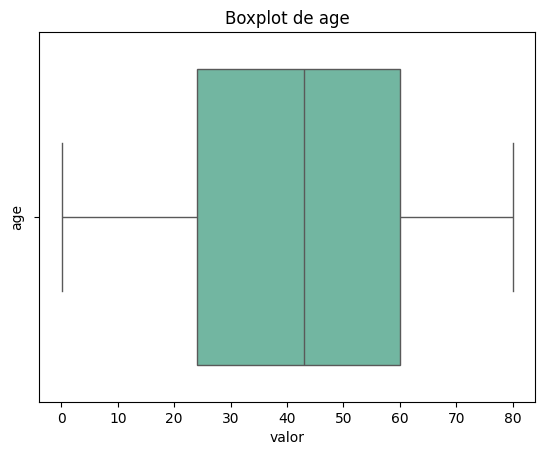

columna: age
outliers: 0
Q1: 24.0
Q3: 60.0
IQR: 36.0


In [116]:


deleter = Delleter('age', df=df_copy, val_z= 1.5)
deleter.plot_df()
deleter.detect_out()


#Distribucion de age
En la distribucion de age se logra notar que tiene mucha heterogenidad lo cual es muy razonable por que son rangos de edades que van de 0.08 (1 mes de vida) a 80 años, claramentre deben ser muy variables por lo que representa la desviacion estandar en este caso.

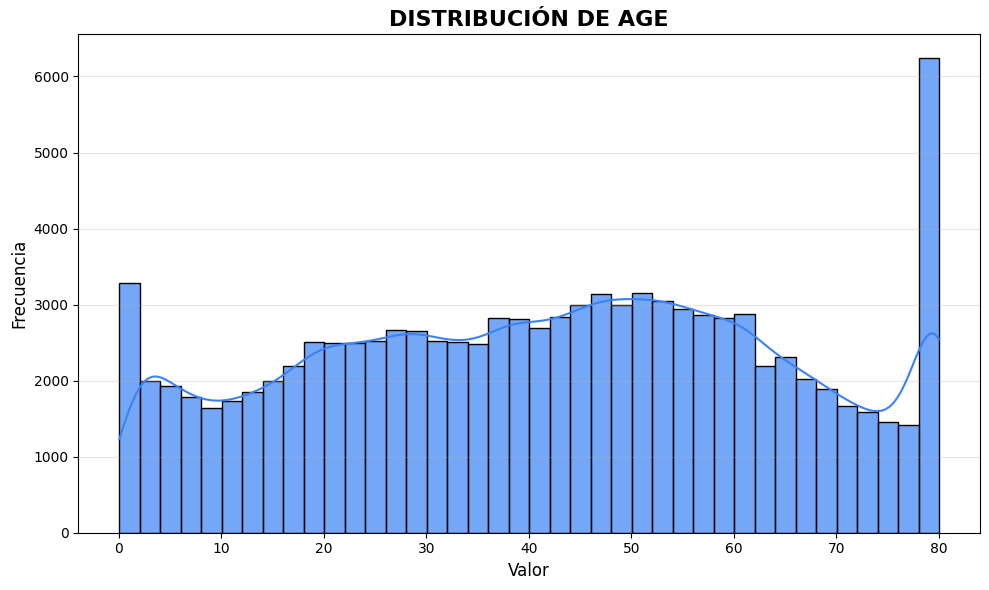

Media: 41.89
Desviación estándar: 22.52


In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy,x='age', bins=40, kde=True, edgecolor='black',
             alpha=0.7, color='#3b82f6')
plt.title(f'DISTRIBUCIÓN DE AGE', fontsize=16, fontweight='bold')
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Media: {df_copy['age'].mean():.2f}")
print(f"Desviación estándar: {df_copy['age'].std():.2f}")

#Filtrado de age
es fundamental filtrar a mis datos y quedarme con el rango que es de interes, en este caso es los pacientes que sean de 18 años a 80 años.

In [95]:
df_filtrado_age = df_copy[(df_copy['age']>=18) & (df_copy['age']<= 80)]

#bmi
En la variable del indice de masa corporal use un valor z de 2.5 para detectar los outliers que se encuentran en los extremos.

originalmente la variable bmi se encontraba en un rango de 10.01 de indice de masa corporal, algo sumamente raro para los estandares de hoy en dia y un punto maximo de 95.6, son dos puntos extremos si hablamos de adultos pero al notar que en mis datos no solo tienen datos de jovenes adultos, adultos y adultos mayores sino que tambien tienen datos de infantes y o neonatos, por lo tanto se trabajaran con un rango de 18 años a 80 años de edad, para que el analisis que se lleva a cabo, simplemente para concentrarme en los pacientes que desarrollaron diabetes, no los que nacieron ya con esta enfermedad.

filtro_max y filtro_min representa el valor minimo y maximo en el que quiero que mi dataframe filtrado se encuentre, en este caso elegi 100 como valor maximo por que quiero obtener los datos de indices muy altos y con sobrepeso, y 15 por que quiero considerar los datos de pacientes con un peso por debajo de lo saludable por si es que los pacientes con ese indice tienen diabetes.

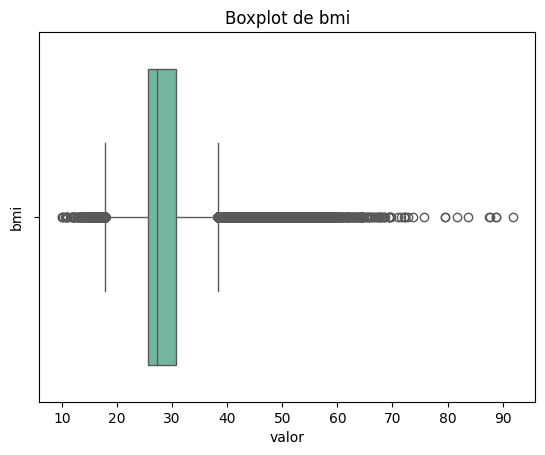

columna: bmi
outliers: 2545
Q1: 25.56
Q3: 30.65
IQR: 5.09


In [96]:
deleter_bmi = Delleter('bmi', df=df_filtrado_age, val_z = 2.5, filtro_max = 100, filtro_min = 15 ) # uso el dataframe filtrado con los parametros de edad de 18 a 80 años
deleter_bmi.plot_df()
deleter_bmi.detect_out()



#Distribucion de bmi
La distribucion del indice de masa corporal es una distribucion con una desviacion estandar de 6,64 y una media de 28.62.
El valor de 6.64 nos dice que la dispersión es moderada. No es extremadamente alta (lo que significaría un conjunto de datos muy inconsistente) ni extremadamente baja (lo que significaría un conjunto de datos muy uniforme).
En conclusion es una distribucion normal.

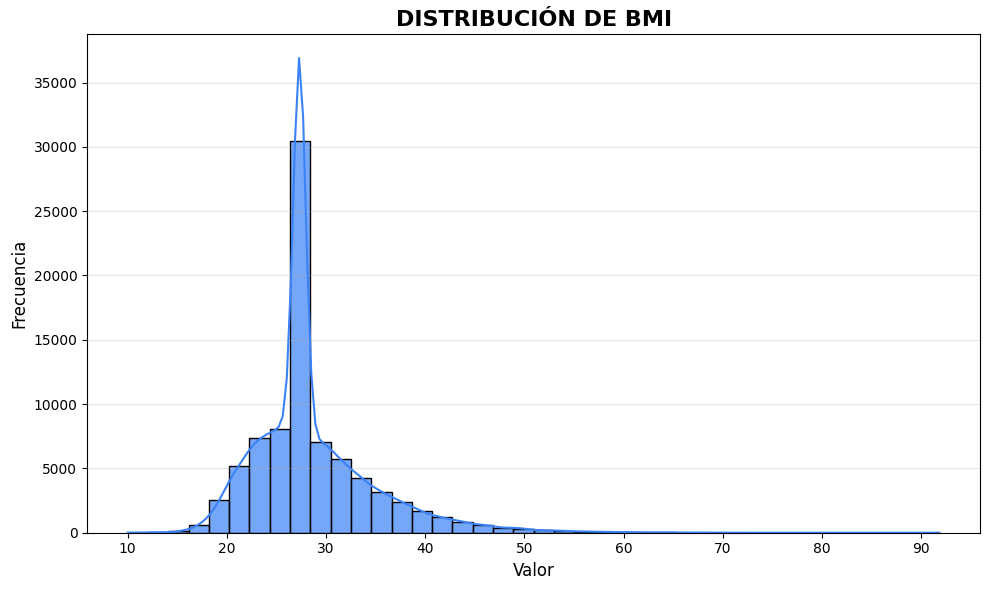

Media: 28.62
Desviación estándar: 6.06


In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado_age,x='bmi', bins=40, kde=True, edgecolor='black',
             alpha=0.7, color='#3b82f6')
plt.title(f'DISTRIBUCIÓN DE BMI', fontsize=16, fontweight='bold')
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


print(f"Media: {df_filtrado_age['bmi'].mean():.2f}")
print(f"Desviación estándar: {df_filtrado_age['bmi'].std():.2f}")

# gender
para gender no tiene mucho que podamos apreciar a simplevista, solo que filtrare la categoria Other para que se el analisis se concentre en Male y Female y que no haya otros factores.
seria medio inutil si hiciera una distribucion de valores ya que hay dos posibilidades en las variables.

In [122]:
df_filtrado_age['gender'].value_counts()

,count
gender,
Female,50096
Male,32671
Other,14


In [125]:


df_fil_g = df_filtrado_age[df_filtrado_age['gender']!='Other']

df_fil_g['gender'].value_counts()

,count
gender,
Female,50096
Male,32671


#diabetes
En diabetes podemos apreciar que es una variable categorica de tipo binario donde 0 = no fue detectado diabetes y 1 = el paciente es pocitivo en diabetes.
Se logra apreciar que el 8,4 de los pacientes fueron detectados con diabetes.

In [126]:
df_fil_g['diabetes'].value_counts()

,count
diabetes,
0,74349
1,8418
